# Canary transactions

The [Cardano Foundation](https://cardanofoundation.org/) regularly submits "canary transactions" to measure the delay from submitting a transaction to its first appearing in a block. See [queries.sql](queries.sql) for the `cardano-db-sync` SQL queries for fetching this data from Cardano mainnet.

## Setup up

In [1]:
suppressMessages({
    require(RColorBrewer, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## Transaction delays in seconds

In [2]:
txs <- fread("canary-txs.csv.gz")
txs %>% summary

      time                            delay            json          
 Min.   :2024-07-22 09:43:30.00   Min.   :-15.00   Length:39166      
 1st Qu.:2024-12-13 17:22:08.00   1st Qu.:  6.00   Class :character  
 Median :2025-03-31 21:25:44.50   Median : 15.00   Mode  :character  
 Mean   :2025-03-29 00:09:17.38   Mean   : 20.88                     
 3rd Qu.:2025-07-11 19:45:00.50   3rd Qu.: 29.00                     
 Max.   :2025-10-21 14:46:28.00   Max.   :487.00                     
  avg_delay_1h     avg_delay_6h  
 Min.   :  1.80   Min.   : 2.00  
 1st Qu.: 14.20   1st Qu.:17.90  
 Median : 19.40   Median :20.40  
 Mean   : 20.88   Mean   :20.88  
 3rd Qu.: 26.00   3rd Qu.:23.40  
 Max.   :260.60   Max.   :78.50  

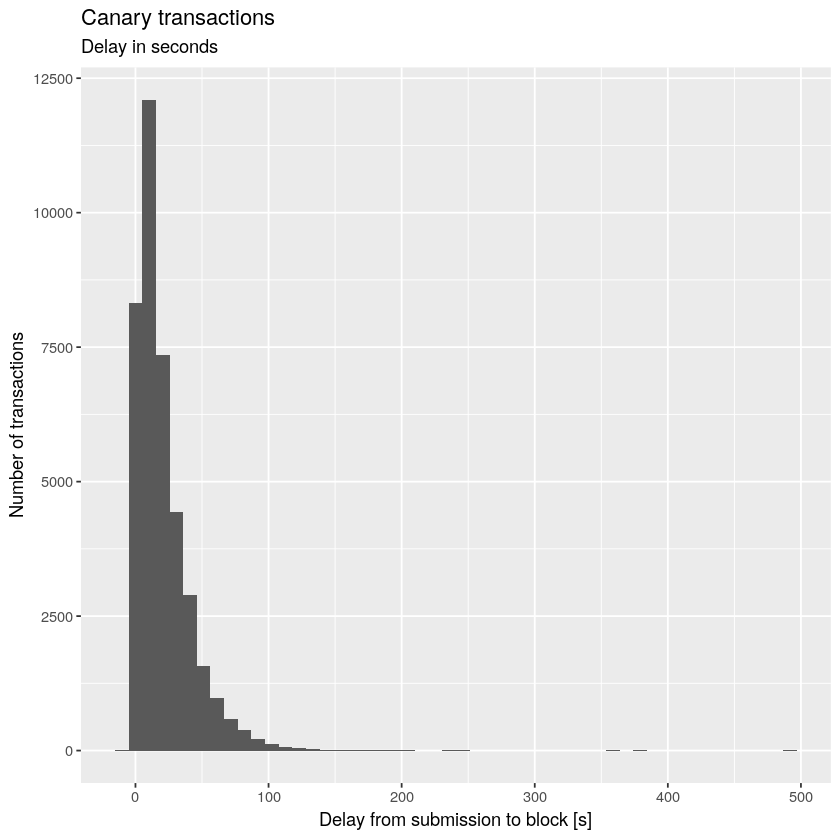

In [3]:
ggplot(txs, aes(x=`delay`)) +
    geom_histogram(bins=50) +
    xlab("Delay from submission to block [s]") +
    ylab("Number of transactions") +
    ggtitle("Canary transactions", "Delay in seconds")

## Transaction delays in blocks

In [4]:
blocks <- fread("canary-blocks.csv.gz")
blocks %>% summary

      time                         block_delay    
 Min.   :2024-07-22 09:43:30.00   Min.   : 1.000  
 1st Qu.:2024-12-13 17:55:19.50   1st Qu.: 1.000  
 Median :2025-03-31 22:33:59.00   Median : 1.000  
 Mean   :2025-03-29 01:00:55.50   Mean   : 1.081  
 3rd Qu.:2025-07-11 20:11:13.50   3rd Qu.: 1.000  
 Max.   :2025-10-21 14:46:28.00   Max.   :23.000  

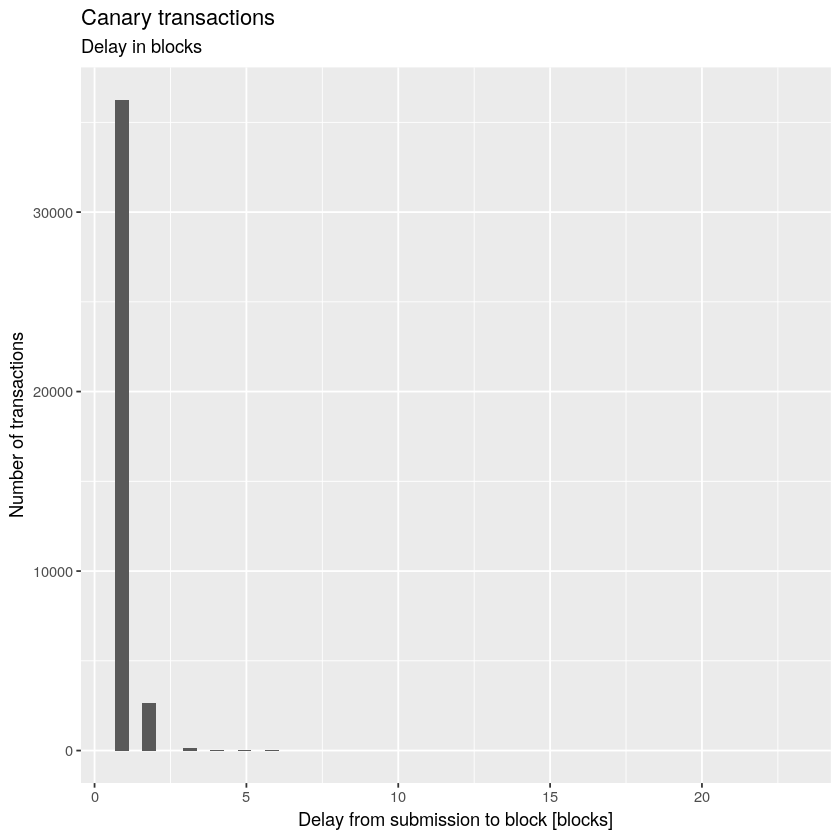

In [5]:
ggplot(blocks, aes(x=`block_delay`)) +
    geom_histogram(bins=50) +
    xlab("Delay from submission to block [blocks]") +
    ylab("Number of transactions") +
    ggtitle("Canary transactions", "Delay in blocks")